In [3]:
import numpy as np
import os 
import matplotlib.pyplot as plt 
%matplotlib inline 

## Population

In [132]:
def initializePopulationReal(dimension, lower, upper, initPopulation):
    return (upper - lower)*(np.random.rand(initPopulation, dimension)) + lower

def initializePopulationBin(dimension, initPopulation):
    return np.random.randint(0, 2, size=(initPopulation, dimension))

def initializerPopulationInteger(dimension, lower, upper, initPopulation):
    return np.random.randint(lower, upper, size=(initPopulation, dimension))

[[1 0 1 1 0]
 [1 1 1 1 0]
 [1 0 1 1 1]
 [1 0 0 1 0]
 [0 1 1 1 1]]


In [133]:
print(initializePopulationBin(5, 5))

[[0 1 1 0 1]
 [1 1 0 0 0]
 [1 1 1 0 1]
 [0 1 1 0 0]
 [0 1 1 1 1]]


## Crossover

In [158]:
def onePointCrossOver(parent1, parent2, verbose=False):    
    position = np.random.randint(1, parent1.shape[0])
    print ('Onepoint Crossover position: ', position) if verbose else None
    child1 = np.append(parent1[0:position], parent2[position:])
    child2 = np.append(parent2[0:position], parent1[position:])
    return child1, child2



In [157]:
# def main():
parent1 = initializePopulationReal(5, 0 ,5, 1)[0]
parent2 =  initializePopulationReal(5, 0 ,5, 1)[0]
child1, child2 = onePointCrossOver(parent1, parent2, True)
print ('parent1: ', parent1)
print ('parent2: ', parent2)
print ('child1: ', child1)
print ('child2: ', child2)

Crossover position:  3
parent1:  [3.52477826 0.24733939 0.76823075 2.25880498 2.93730054]
parent2:  [2.7976272  4.69670429 4.37656476 1.73899378 2.2223635 ]
child1:  [3.52477826 0.24733939 0.76823075 1.73899378 2.2223635 ]
child2:  [2.7976272  4.69670429 4.37656476 2.25880498 2.93730054]


## Mutation

In [159]:
arr = np.array([[1, 2], [3, 4]])
arr

array([[1, 2],
       [3, 4]])

In [216]:
probability = 0.5
arr = np.array([[1, 0], [0, 1]])
def binaryMutation(parent, probability):
    mutate = lambda x: 1-x if (np.random.rand() < probability) else x
    return np.vectorize(mutate)(parent)

binaryMutation(arr, probability)

array([[1, 1],
       [0, 0]])

In [126]:
dim = 20
x = np.array([1, 2, 3])

## Evaluations 
### 1: Rotated High Conditioned Elliptic Function 

In [25]:
def shiftVector(x, function_number):
    """ Offsets all elements of vector x by elements of vector offset """    
    offset = np.loadtxt('./input_data/shift_data_{}.txt'.format(function_number))[:len(x)]        
    return np.array(x)-offset

shiftVector([100, 100, 100], 2)

[-54.05083069  47.08552651 -30.20559327]


array([154.05083069,  52.91447349, 130.20559327])

In [39]:
def rotateVector(x, function_number):    
    rotation = np.loadtxt('./input_data/M_{}_D{}.txt'.format(function_number, len(x)))            
    return np.array(x).dot(rotation)

In [43]:
rotateVector([1,0], 9)

array([ 0.99982795, -0.01854918])

In [47]:
def shiftRotateVector(x, function_number, shift_flag=True, rotate_flag=True, shift_rate=1): 
    """ :param x (np.array): 
        :param offset (np.array): 
        :rotation (np.array): rotation matrix
        :shift_flag (boolean): 
        :rotate_flag (boolean): 
        :shift_rate (float): 
    """

    if (shift_flag):   
        x_shift = shiftVector(x, function_number)
        # Shrink to the original search space 
        x_shrink = shift_rate*x_shift
        if not rotate_flag:
            return x_shrink
        return rotateVector(x_shrink, function_number)        
    
    # Shrink to the original search space 
    x_shrink = shift_rate*x    
    if not rotate_flag:
        return x_shrink

    return shiftVector(x_shrink, function_number)

shiftRotateVector([100, 100], 2, shift_rate=5)

[-54.05083069  47.08552651]


array([372.41140687, 724.29258076])

In [95]:
def highConditionedElliptic(x, dim):
    assert dim > 0
    res = 0
    for i, x_i in enumerate(x):
        res += (1e6)**((i-1)/(dim-1))*x_i**2
    
    return res 

In [117]:
arr = np.arange(-100, 101, 1)
z = np.zeros((arr.shape[0], arr.shape[0]))
for i, x_i in enumerate(arr):
    for j, y_j in enumerate(arr):
        z[i][j] = rotatedHighConditionedElliptic([x_i, y_j], dim)

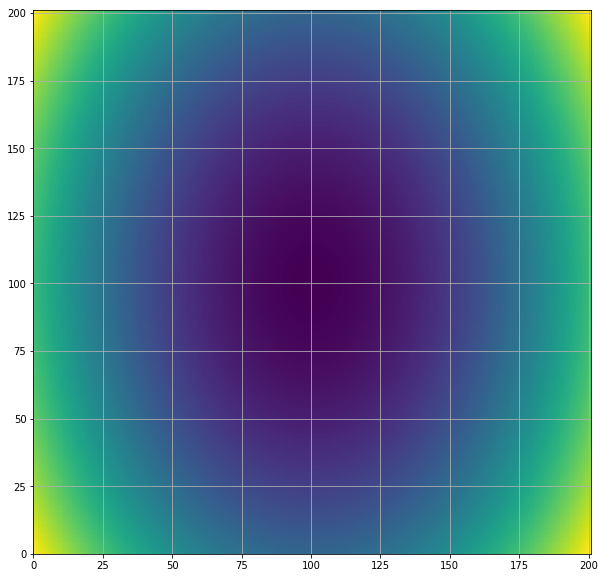

In [125]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pcolormesh(z)
ax.grid(True)

### Weierstrass

In [15]:
def weierstrass(x, dim, a = .5, b=3, k_max=20):
    sum_a, sum_b = 0, 0    
    for i, x_i in enumerate(x):
        for k in np.arange(k_max):
            sum_a += (a**k)*np.cos(2*np.pi*(b**k)*(x_i+0.5))
    for k in np.arange(k_max):
        sum_b += (a**k)*np.cos(2*np.pi*(b**k)*0.5)
        
    return sum_a-dim*sum_b
    
weierstrass(x, dim)


33.99996757507324

### Griewank

In [24]:
def griewank(x, dim)
    x = np.array(x[:dim])
    prod = 0
    for i, x_i in enumerate(x):
        prod *= np.cos(x_i/np.sqrt(i+1))

    1/4000.0*np.sum((x**2))-prod+1

1.0035

### Rastrigin

In [58]:
def rastrigin(x, dim):
    assert dim > 0
    x = np.array(x[:dim])
    return np.sum(x**2-10*np.cos(2*np.pi*x)+10)

rastrigin([1,2,.4, .7], 4)


36.83033988749895

### HGBat Function

In [61]:
def hgbat(x, dim):
    assert dim > 0
    x = np.array(x)[:dim]
    return np.sqrt(np.sum(x**2)**2-np.sum(x)**2)+(0.5*np.sum(x**2)+np.sum(x))/dim + 0.5
dim = 3
x = np.array([1,2,3])
hgbat(x, dim)

17.482443974006852

### Modified Schwefel

In [77]:
def modifiedSchwefel(x, dim):
    assert dim > 0
    x = np.array(x[:dim])    
    res = 0
    def g(z):
        if abs(z) <= 500:
            return z*np.sin(np.sqrt(abs(z)))
        elif z > 500:
            return (500 - z%500)*np.sin(np.sqrt(abs(500-z%500)))-((z-500)**2)/(10000*dim)
        return (-500 + z%500)*np.sin(np.sqrt(abs(-500+z%500)))-((z+500)**2)/(10000*dim)
    for x_i in x:
        x_i = x_i+4.209687462275036e2
        res += g(x_i)
    
    return 418.9829*dim-res
    
modifiedSchwefel(x, dim)

7124.477034369101

### Expanded Scaffer F6

In [94]:
def expandedScafferF6(x, dim):
    assert dim > 0
    x = np.array(x[:dim])
    g = lambda x, y: .5+((np.sin(np.sqrt(x**2+y**2)))**2-0.5)/((1+.001*(x**2+y**2))**2)    
    res = 0
    for i in np.arange(len(x)-1):
        res += g(x[i], x[i+1])
    
    return res + g(x[-1], x[0])

expandedScafferF6(x, dim)

0.8359576882183244

In [127]:
f = lambda x: x**2

def g(z):
    print (z)
    if abs(z) <= 500:
        return z*np.sin(np.sqrt(abs(z)))
    elif z > 500:
        return (500 - z%500)*np.sin(np.sqrt(abs(500-z%500)))-((z-500)**2)/(10000*dim)
    return (-500 + z%500)*np.sin(np.sqrt(abs(-500+z%500)))-((z+500)**2)/(10000*dim)



In [66]:
def getCecFunction(function_number):
    switcher = {
        1: rotatedHighConditionedElliptic,
        2: rotatedBentCigar,
        6: shiftedRotatedWeierstrass,
        7: shiftedRotatedGriewank,
        9: shiftedRotatedRastrigin,
        14: shiftRotatedHGBat
    }
    return switcher.get(function_number, lambda: "Invalid function number: " + str(function_number))

getCecFunction(1)

NameError: name 'rotatedBentCigar' is not defined